In [45]:
import pandas as pd
import numpy as np
import matplotlib.axes as axis
import matplotlib.pyplot as plt

Let's check what the number of anime that have been loaded in the main csv file:


In [46]:
fullDF = pd.read_csv('anime_data.csv')
print(fullDF.info())    #Gives the total sets of data and the data type of each column
null_count = fullDF.isnull().sum()
print(null_count)  #Count the number of nulls in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3205 non-null   int64  
 1   title         3205 non-null   object 
 2   startDate     3205 non-null   object 
 3   popularity    3205 non-null   int64  
 4   favourites    3205 non-null   int64  
 5   tags          3205 non-null   object 
 6   genres        3205 non-null   object 
 7   averageScore  3205 non-null   int64  
 8   episodes      3205 non-null   int64  
 9   duration      3203 non-null   float64
 10  description   3202 non-null   object 
 11  studios       3205 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 300.6+ KB
None
id              0
title           0
startDate       0
popularity      0
favourites      0
tags            0
genres          0
averageScore    0
episodes        0
duration        2
description     3
studios         0
dtype:

Now let's do the same but for the other dataframe


<h2>Reformatting the Data </h2></br>
<p>Let's start by removing the NaN values in the dataset. </p>

In [47]:
fullDF = fullDF.dropna()
print(fullDF.info()) 
#I want to view all the null values anime

#print(df_nan)  #Count the number of nulls in our dataset


<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 0 to 3204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3201 non-null   int64  
 1   title         3201 non-null   object 
 2   startDate     3201 non-null   object 
 3   popularity    3201 non-null   int64  
 4   favourites    3201 non-null   int64  
 5   tags          3201 non-null   object 
 6   genres        3201 non-null   object 
 7   averageScore  3201 non-null   int64  
 8   episodes      3201 non-null   int64  
 9   duration      3201 non-null   float64
 10  description   3201 non-null   object 
 11  studios       3201 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 325.1+ KB
None


Let's make the Titles a little better

In [48]:
#Creat a new dataframe with json_normalize function
#This pandas function will convert the dictionary data into a dataframe
titleData = fullDF['title'].str.split(', \'', expand=True)
titleData.columns = ['Romaji', 'English']
titleData['Romaji'] = titleData['Romaji'].str.replace('{\'romaji\': ', '')
titleData['English'] = titleData['English'].str.replace('english\': ', '')
titleData['English'] = titleData['English'].str.replace('}', '')

fullDF = fullDF.drop(axis=1, columns='title')   #once this runs, the title column will be removed forever, so rerun the code from the beginning
fullDF.insert(loc=1, column=titleData.columns[0], value=titleData['Romaji'])
fullDF.insert(loc=2, column=titleData.columns[1], value=titleData['English'])
#Same for the startDate column
fullDF['startDate'] = fullDF['startDate'].str.replace('{\'year\': ', '')
fullDF['startDate'] = fullDF['startDate'].str.replace('}', '')
print(fullDF.head())
#df_title = pd.json_normalize(fullDF['title'])


       id                   Romaji                           English  \
0   16498     'Shingeki no Kyojin'                 'Attack on Titan'   
1  101922       'Kimetsu no Yaiba'  'Demon Slayer: Kimetsu no Yaiba'   
2    1535             'DEATH NOTE'                      'Death Note'   
3  113415         'Jujutsu Kaisen'                  'JUJUTSU KAISEN'   
4   21459  'Boku no Hero Academia'                'My Hero Academia'   

  startDate  popularity  favourites  \
0      2013      769756       48653   
1      2019      727599       39973   
2      2006      700617       38859   
3      2020      668266       48203   
4      2016      666087       19848   

                                                tags  \
0  [{'name': 'Survival'}, {'name': 'Kaiju'}, {'na...   
1  [{'name': 'Demons'}, {'name': 'Shounen'}, {'na...   
2  [{'name': 'Crime'}, {'name': 'Detective'}, {'n...   
3  [{'name': 'Urban Fantasy'}, {'name': 'Shounen'...   
4  [{'name': 'Super Power'}, {'name': 'Superhero'...

Let us plot down the top 10 anime, according to scores and popularity.

Text(0.5, 1.0, 'Top 10 Popular Anime')

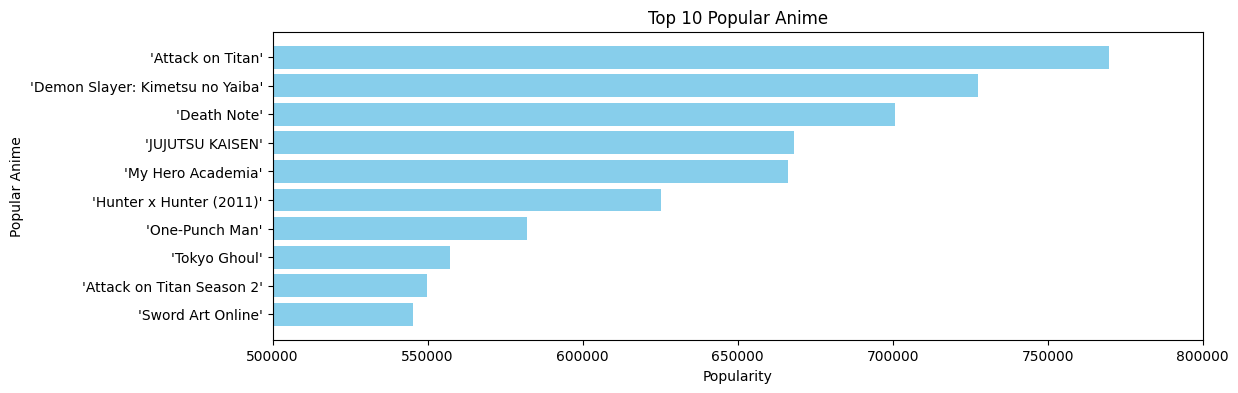

In [49]:
popular = fullDF[["Romaji", "English", "popularity"]] 
plt.figure(figsize=(12, 4))

plt.barh(popular['English'][:10], popular['popularity'][:10], color='skyblue', align='center')
plt.gca().invert_yaxis()
plt.xlim(500000, 800000)
plt.xlabel('Popularity')
plt.ylabel('Popular Anime')
plt.title('Top 10 Popular Anime')

Text(0.5, 1.0, 'Top 10 Anime')

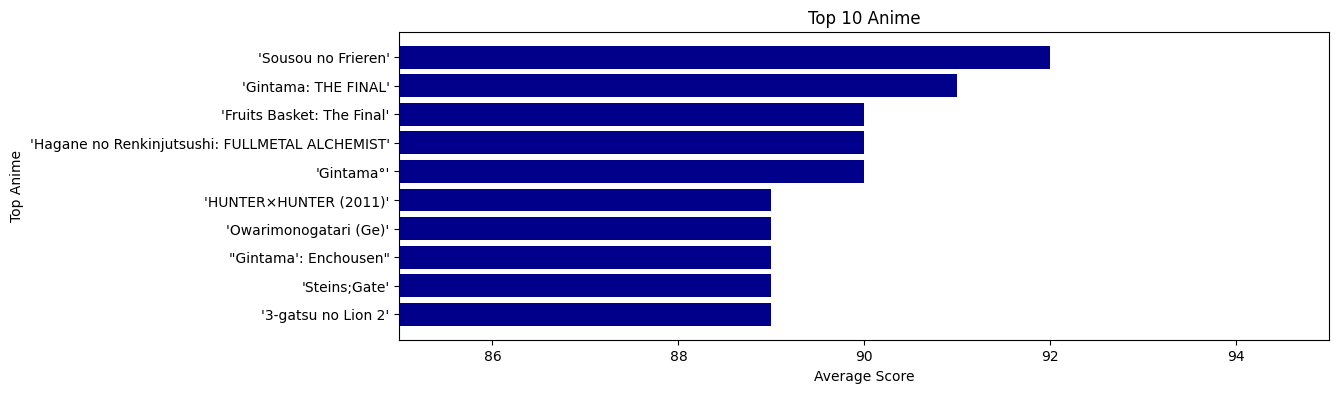

In [50]:
sortedDF = fullDF[["Romaji", "English", "averageScore", "favourites", "popularity"]]
sortedDF = sortedDF.sort_values(by='averageScore', ascending=False)
scores = sortedDF[["Romaji", "averageScore"]]
plt.figure(figsize=(12, 4))

plt.barh(scores['Romaji'][:10], scores['averageScore'][:10], color='darkblue', align='center')
plt.gca().invert_yaxis()
plt.xlim(85, 95)
plt.xlabel('Average Score')
plt.ylabel('Top Anime')
plt.title('Top 10 Anime')

From the above graph we see that there are multiple anime with the same score. Also, Gintama has way too many highly rated seasons. Using the popularity and score alone for a recommendations can be a failure since the anime's above have really unrelated plots, well except maybe Gintama.

This is what my plan is, convert the genres column into a bigger Genres column that has all the genres as smaller seperate columns. If the anime has that genre used in it, it would have a 1, else a 0. 

on 01/06/2024<h2>THIS IS IDEA IS ACTUALLY CORRECT!!!!!!! IT'S CALLED COUNT VECTORIZER</h2>

Given up on that idea, lol, instead here's a cleaner version of tags, genres and studios. I have first cleaned them by removing the wierd name: thing from the tags and similar in the studios columns, I have removed the nodes: name: part and only kept the studios. Everyone has tags, genre and studios as objects in a column, or a list of objects. 


In [51]:
df_change = fullDF['genres'].str.split(',').tolist()
#I have a list or lists.
#Each list of list contains a string
#The String has not only words but also other shit in it
#I want to remove the other shit
genreList = []
for i in range(len(df_change)):
    for j in range(len(df_change[i])):
         string = df_change[i][j]
         df_change[i][j]= ''.join(letter.lower() for letter in string if letter.isalnum())
         #adding into out genre list
         if df_change[i][j] not in genreList:
            genreList.append(df_change[i][j])
fullDF['genres'] = df_change
genreList.pop()
#print(genreList)


#Let's do the same but for tags
tagsDF = fullDF['tags'].str.split(', ').tolist()
for i in range(len(tagsDF)):
    for j in range(len(tagsDF[i])):
        tags = tagsDF[i][j]
        tagsDF[i][j] = ''.join(letter.lower() for letter in tags if letter.isalnum())
        tagsDF[i][j] = tagsDF[i][j].replace("name", "")
fullDF['tags'] = tagsDF


#Lets do the same but for studios
studDF = fullDF['studios'].str.split(', ').tolist()
for i in range(len(studDF)):
    for j in range(len(studDF[i])):
        studs = studDF[i][j]
        studDF[i][j] = ''.join(letter.lower() for letter in studs if letter.isalnum())
        studDF[i][j] = studDF[i][j].replace("nodesname", "")
    studDF[i] = ''.join(studDF[i][0])
fullDF['studios'] = studDF

In [52]:
#print(fullDF.head())
print(fullDF.columns)

Index(['id', 'Romaji', 'English', 'startDate', 'popularity', 'favourites',
       'tags', 'genres', 'averageScore', 'episodes', 'duration', 'description',
       'studios'],
      dtype='object')


Now all the tags and genres have become iterable objects instead of dead strings. Now we can easily convert them into some form of vectors</br>
If we want we can also use the studios column in out recommendations...</br>

Let's use scikit learns CountVectorizer to create a matrix of 1s and 0s of the tags, genres and studios. First we will need to make a datafram that only uses those specific features. So now lets create a  'metadata soup', or let's just mix all the datas we cleaned thus far.

Listen to this!</br>
https://youtu.be/5YuQQwLGTxA?si=jqYBXglrvV5ABs87

In [53]:
def create_soup(x):
    return ' '.join(x['genres']) + ' ' + ' '.join(x['tags']) + ' ' + x['studios'] 
fullDF['soup'] = fullDF.apply(create_soup, axis=1)


This has now created a new column with genre, tags, and studios as a string

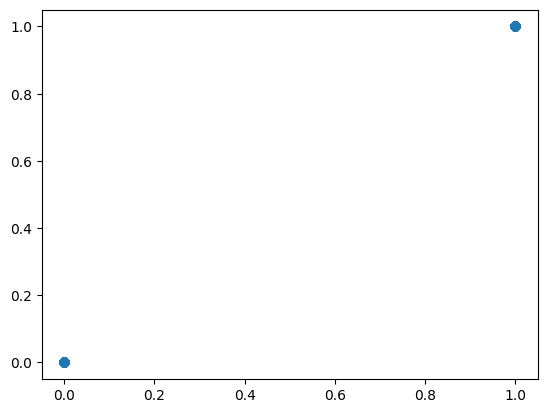

In [72]:
#Importing CountVectorizer and creating the count matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = CountVectorizer(stop_words='english')
count_matrix = vectorizer.fit_transform(fullDF['soup'])
checkTest = vectorizer.get_feature_names_out(fullDF['soup'])

#print(count_matrix.toarray()[0])
